In [99]:
'''
El dataset Titanic presenta un problema de clasificación. Se busca predecir la supervivencia de una persona basada en características 
como la clase del pasajero (Pclass), su género (Sex), su edad (Age), el número de hermanos y pareja a bordo, (SibSp), el número de padres 
e hijos a bordo (Parch), entre otras.
'''

'\nEl dataset Titanic presenta un problema de clasificación. Se busca predecir la supervivencia de una persona basada en características \ncomo la clase del pasajero (Pclass), su género (Sex), su edad (Age), el número de hermanos y pareja a bordo, (SibSp), el número de padres \ne hijos a bordo (Parch), entre otras.\n'

In [100]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import pandas as pd
import missingno as msno

In [101]:
titanic_url = 'https://raw.githubusercontent.com/JuezUN/datasets/master/titanic.csv'
titanic_df = pd.read_csv(titanic_url)

In [102]:
'''
Las mismas reglas de indexación aplicadas a series aplican tambien a Dataframes, con la particularidad de que con el operador [] estaremos 
refiriéndonos a columnas y nos devolverá la serie correspondiente.

'''

titanic_df[['Name', 'Pclass']]

,Name,Pclass
0,"Braund, Mr. Owen Harris",3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",3
...,...,...
886,"Montvila, Rev. Juozas",2
887,"Graham, Miss. Margaret Edith",1
888,"Johnston, Miss. Catherine Helen ""Carrie""",3
889,"Behr, Mr. Karl Howell",1


In [103]:
# titanic_df.info: Sale toda la información
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [118]:
#Eliminamos la columna Cabin porque tiene muchos datos faltantes.
#Recordar: axis=0 se refiere a las filas (operaciones a lo largo del índice) y 
#axis=1 se refiere a las columnas (operaciones a lo largo de las columnas).

#titanic_final = titanic_depurado.dropna(axis = 0) , el dropna elimina todos los valores faltantes

titanic_depurado = titanic_df.drop(['Cabin','PassengerId'], axis = 1)

In [119]:
titanic_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [120]:
print(titanic_depurado.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64


<Axes: >

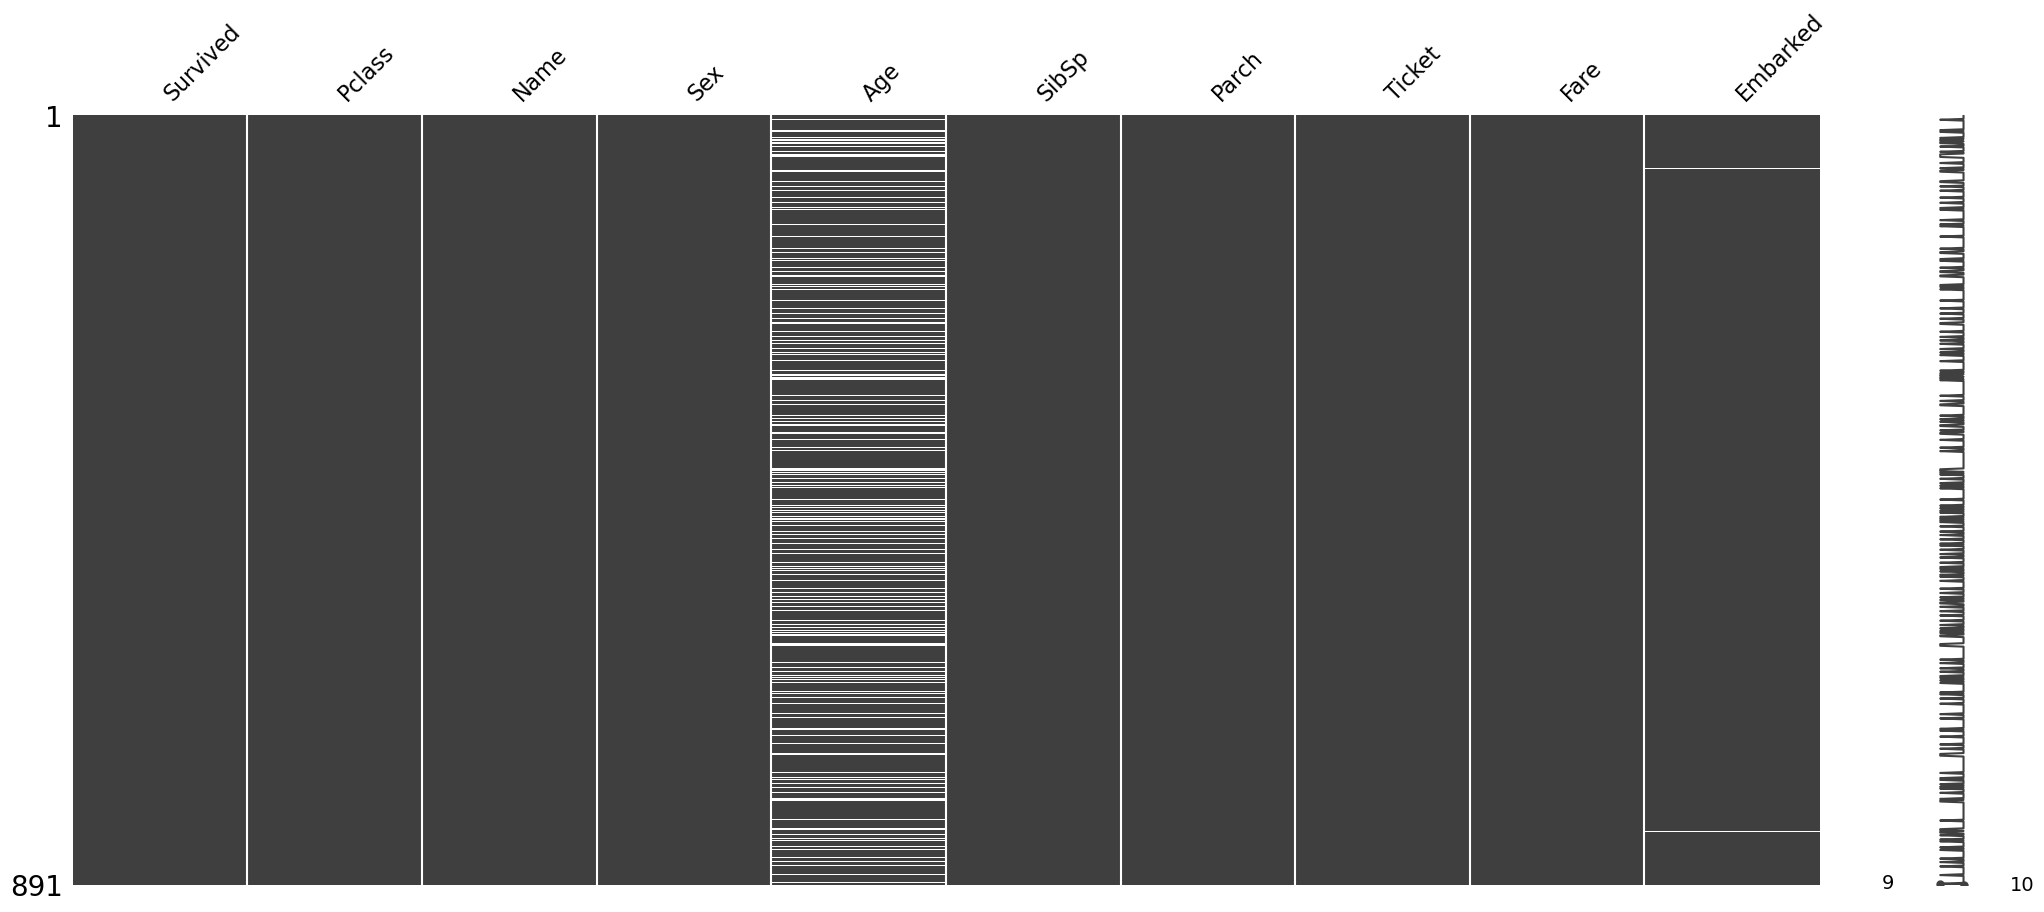

In [121]:
msno.matrix(titanic_depurado)

In [122]:
# Media

titanic_mean=titanic_depurado['Age'].mean()
print(titanic_mean)

29.69911764705882


In [123]:
#Imputar datos con valores numéricos (estadísticos: Media)
#Inplace en True, me retorna el df con la modificación
titanic_depurado['Age'].infer_objects(copy=False).fillna(titanic_mean, inplace=True)

/var/folders/_z/5f796ssx3hb2gftd4pk11yjm0000gn/T/ipykernel_4340/302283541.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_depurado['Age'].infer_objects(copy=False).fillna(titanic_mean, inplace=True)


<Axes: >

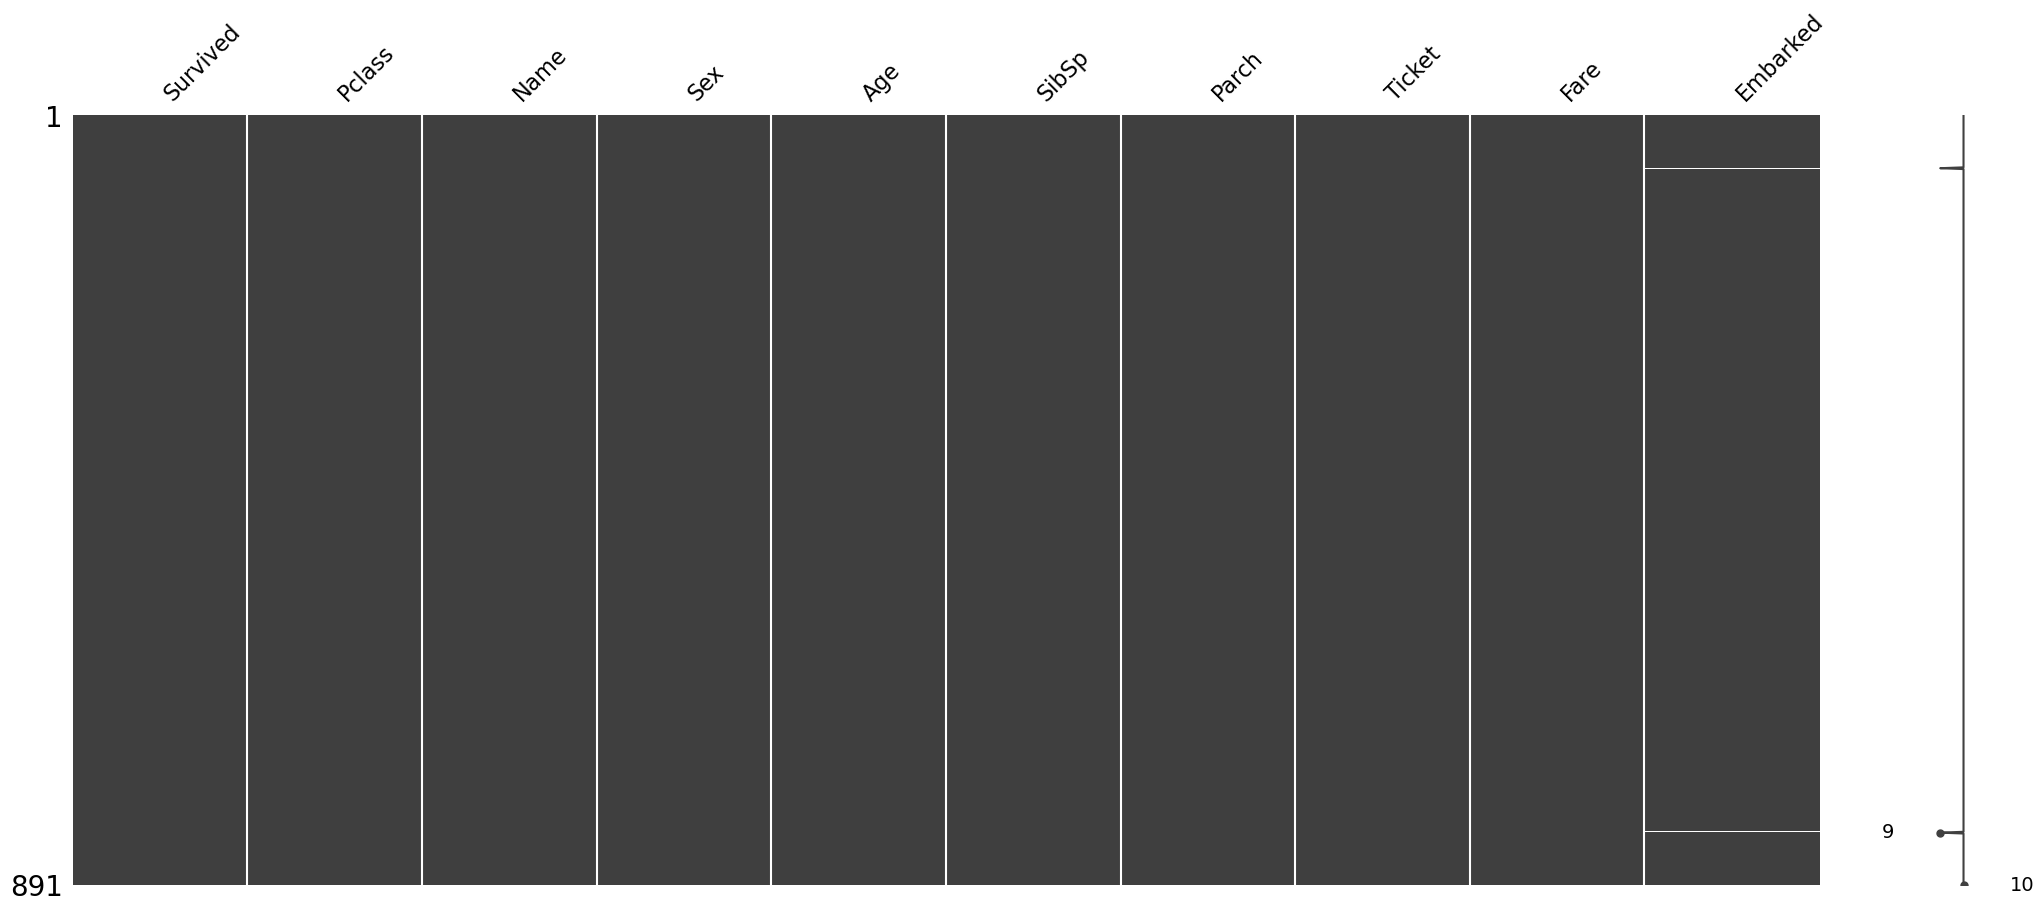

In [124]:
msno.matrix(titanic_depurado)

In [125]:
titanic_depurado.info()
titanic_depurado.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


(891, 10)

In [142]:
'''
Debemos quitar la etiqueta de Survived, porque es la etiqueta que buscamos predecir.
'''

X = titanic_depurado.drop(['Survived'],axis=1) #DataFrame de Pandas
y = titanic_depurado['Survived'] #Series de Pandas

print (type(X)) 
print (type(y))

#Al ser una serie de pandas se debe convertir en string:
#print("y: " + " ".join(y.astype(str)))

print (X.shape)
print (y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(891, 9)
(891,)
